In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

%matplotlib inline

/home/sshankar/env/fastsrm/lib/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [2]:
shared_resp_dir = '/home/sshankar/raiders/3mm/fastsrm/single_run/'
os.chdir(shared_resp_dir)

In [3]:
# Correlate runs 1 and 11 since they have the same input
r1 = np.load('shared_resp_run1_niter1000.npy')
r11 = np.load('shared_resp_run11_niter1000.npy')

# Same with runs 2 and 12
r2 = np.load('shared_resp_run2_niter1000.npy')
r12 = np.load('shared_resp_run12_niter1000.npy')

In [89]:
# Print the lengths of the different runs
# Useful for correlation
print(len(r1[0]), len(r2[0]), len(r11[0]), len(r12[0]))

374 297 375 314


Text(0.5, 1.0, 'Run #1, Component #1\nRed: Full timeseries, Blue: Timeseries till video end')

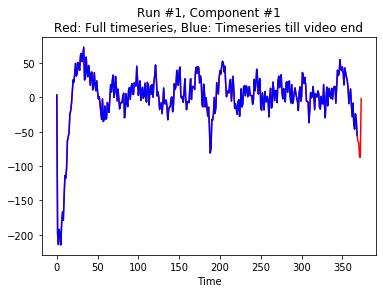

In [260]:
# For run 1, the video ends on TR #369 and acquisition continues on
# for a few more TRs. 
# Plot the shared response until end of video to see if the trailing 
# peak/trough is caused by end of video.

# Run #1, Component #1
plt.plot(r1[0], 'r')
plt.plot(r1[0,0:369], 'b')
plt.xlabel('Time')
plt.title('Run #1, Component #1\nRed: Full timeseries, Blue: Timeseries till video end')

Text(0.5, 1.0, 'Run #1, Component #2\nRed: Full timeseries, Blue: Timeseries till video end')

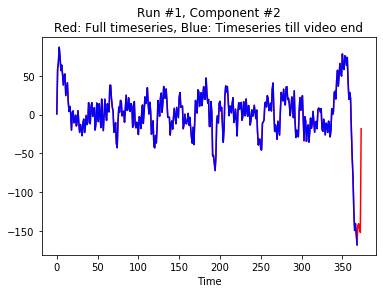

In [261]:
# Run #1, Component #2
plt.plot(r1[1], 'r')
plt.plot(r1[1,0:369], 'b')
plt.xlabel('Time')
plt.title('Run #1, Component #2\nRed: Full timeseries, Blue: Timeseries till video end')

Text(0.5, 1.0, 'Run #2, Component #2\nRed: Full timeseries, Blue: Timeseries till video end')

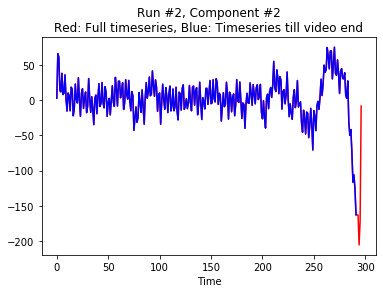

In [262]:
# Run #2, Component #2
plt.plot(r2[1], 'r')
plt.plot(r2[1,0:292], 'b')
plt.xlabel('Time')
plt.title('Run #2, Component #2\nRed: Full timeseries, Blue: Timeseries till video end')

It's not obvious that the trailing peaks/troughs
are caused by the scanner running without any stimulus 
being presented.

In [263]:
# Correlate corresponding shared responses of runs 1 and 11
r1_11 = np.zeros(20)
for i in range(20):
    r1_11[i] = np.corrcoef(r1[i], r11[i,0:-1])[0,1]
    
print(abs(r1_11))

[0.12967782 0.15220253 0.44026443 0.26070366 0.72406987 0.43267233
 0.51755113 0.2613119  0.22253926 0.19092476 0.15165696 0.29297212
 0.15765743 0.05486463 0.0405364  0.14646943 0.0471627  0.03135153
 0.03491171 0.07251829]


In [264]:
# Correlate corresponding shared responses of runs 2 and 12
r2_12 = np.zeros(20)
for i in range(20):
    r2_12[i] = np.corrcoef(r2[i], r12[i,0:-17])[0,1]
    
print(abs(r2_12))

[0.88917826 0.15295339 0.5694738  0.34811281 0.04865608 0.08333185
 0.11477097 0.19127055 0.21653156 0.00361568 0.03269618 0.08611606
 0.16614617 0.03745583 0.07611302 0.01386641 0.11302298 0.09551054
 0.04445736 0.07318021]


Text(0.5, 1.0, 'Correlations between runs with similar inputs\nRed: Run 1 and Run 11, Blue: Run 2 and Run 12')

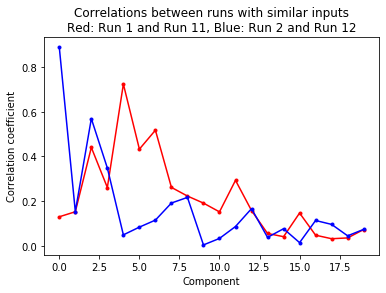

In [270]:
# Plot the correlations 
# Plotting the absolute values because signs are not important
plt.plot(abs(r1_11), 'r.-')
plt.plot(abs(r2_12), 'b.-')
plt.xlabel('Component')
plt.ylabel('Correlation coefficient')
plt.title('Correlations between runs with similar inputs\nRed: Run 1 and Run 11, Blue: Run 2 and Run 12')

These correlation values are decent, at least for the first few components, 
but let's see if a different (non-corresponding) component of run 11 
correlates better with the components of run 1.

In [266]:
# Compare each component of run 1 with every component 
# of run 11 to see if there's a better match
best_comp_1_11 = np.zeros(20)
best_corr_1_11 = np.zeros(20)

for i in range(20):
    for j in range(20):
        tempcorr = np.corrcoef(r1[i], r11[j,0:-1])[0,1]
        if np.abs(tempcorr) > np.abs(best_corr_1_11[i]):
            best_corr_1_11[i] = abs(tempcorr)
            best_comp_1_11[i] = j       

# Print the best-matched component of run 11 for every 
# component of run 1
print('Corrcoeff Component\n')
for i in range(20):
    print(np.round(best_corr_1_11[i],2), '\t', np.int(best_comp_1_11[i])+1)

Corrcoeff Component

0.6 	 2
0.63 	 1
0.64 	 2
0.75 	 3
0.72 	 5
0.53 	 8
0.52 	 7
0.34 	 13
0.28 	 20
0.27 	 18
0.25 	 15
0.3 	 15
0.23 	 18
0.23 	 11
0.31 	 14
0.28 	 15
0.25 	 14
0.21 	 20
0.34 	 13
0.19 	 11


In [267]:
# And the other way around, to see if there's a big difference
# Compare each component of run 11 with every component 
# of run 1 to see if there's a better match
best_comp_11_1 = np.zeros(20)
best_corr_11_1 = np.zeros(20)

for i in range(20):
    for j in range(20):
        tempcorr = np.corrcoef(r11[i,0:-1], r1[j])[0,1]
        if np.abs(tempcorr) > np.abs(best_corr_11_1[i]):
            best_corr_11_1[i] = abs(tempcorr)
            best_comp_11_1[i] = j       

# Print the best-matched component of run 11 for every 
# component of run 1
print('Corrcoeff Component\n')
for i in range(20):
    print(np.round(best_corr_11_1[i],2), '\t', np.int(best_comp_11_1[i])+1)

Corrcoeff Component

0.63 	 2
0.64 	 3
0.75 	 4
0.55 	 1
0.72 	 5
0.44 	 7
0.52 	 7
0.53 	 6
0.32 	 8
0.28 	 8
0.25 	 12
0.29 	 12
0.34 	 19
0.34 	 8
0.3 	 12
0.19 	 10
0.24 	 15
0.27 	 10
0.22 	 14
0.28 	 9


In [268]:
# Compare each component of run 2 with every component 
# of run 12 to see if there's a better match
best_comp_2_12 = np.zeros(20)
best_corr_2_12 = np.zeros(20)

for i in range(20):
    for j in range(20):
        tempcorr = np.corrcoef(r2_scaled[i], r12_scaled[j,0:-17])[0,1]
        if np.abs(tempcorr) > np.abs(best_corr_2_12[i]):
            best_corr_2_12[i] = abs(tempcorr)
            best_comp_2_12[i] = j       

# Print the best-matched component of run 11 for every 
# component of run 1
print('Corrcoeff Component\n')
for i in range(20):
    print(np.round(best_corr_2_12[i],2), '\t', np.int(best_comp_2_12[i])+1)

Corrcoeff Component

0.75 	 1
0.48 	 3
0.65 	 2
0.74 	 3
0.24 	 15
0.27 	 7
0.27 	 13
0.32 	 5
0.32 	 17
0.27 	 8
0.29 	 9
0.19 	 5
0.21 	 6
0.35 	 19
0.27 	 8
0.12 	 8
0.21 	 16
0.21 	 4
0.18 	 5
0.24 	 1


In [269]:
# Compare each component of run 2 with every component 
# of run 12 to see if there's a better match
best_comp_12_2 = np.zeros(20)
best_corr_12_2 = np.zeros(20)

for i in range(20):
    for j in range(20):
        tempcorr = np.corrcoef(r12_scaled[i,0:-17], r2_scaled[j])[0,1]
        if np.abs(tempcorr) > np.abs(best_corr_12_2[i]):
            best_corr_12_2[i] = abs(tempcorr)
            best_comp_12_2[i] = j       

# Print the best-matched component of run 11 for every 
# component of run 1
print('Corrcoeff Component\n')
for i in range(20):
    print(np.round(best_corr_12_2[i],2), '\t', np.int(best_comp_12_2[i])+1)

Corrcoeff Component

0.75 	 1
0.65 	 3
0.74 	 4
0.53 	 3
0.32 	 1
0.22 	 7
0.27 	 6
0.27 	 15
0.29 	 11
0.18 	 14
0.26 	 14
0.25 	 6
0.27 	 7
0.19 	 3
0.24 	 5
0.27 	 3
0.32 	 9
0.29 	 3
0.35 	 14
0.25 	 3


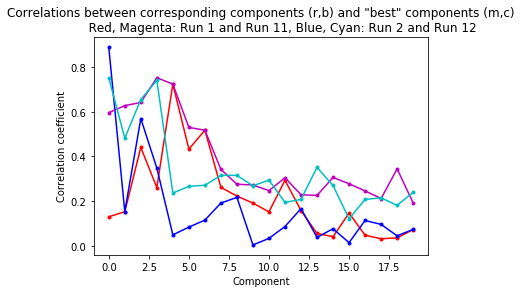

In [273]:
# Plot the correlation values with the "best" correlated components 
# and the correlation values with the corresponding components
plt.plot(abs(r1_11), 'r.-')
plt.plot(abs(r2_12), 'b.-')
plt.plot(best_corr_1_11, 'm.-')
plt.plot(best_corr_2_12, 'c.-')
plt.xlabel('Component')
plt.ylabel('Correlation coefficient')
plt.title('Correlations between corresponding components (r,b) and "best" components (m,c)\n \
          Red, Magenta: Run 1 and Run 11, Blue, Cyan: Run 2 and Run 12');

The "best matched" components have slightly better correlations for runs 1 and 11, 
and are better between runs 2 and 12

The large peaks and troughs at the end, or the spikes could 
bias the correlation values, so let's try it again with 
scaled shared responses

In [44]:
from sklearn.preprocessing import scale

In [45]:
r1_scaled = scale(r1)
r2_scaled = scale(r2)
r11_scaled = scale(r11)
r12_scaled = scale(r12)

In [246]:
# Correlate corresponding shared responses of runs 1 and 11
r1_11_scaled = np.zeros(20)
r2_12_scaled = np.zeros(20)

for i in range(20):
    r1_11_scaled[i] = np.corrcoef(r1_scaled[i], r11_scaled[i,0:-1])[0,1]
    r2_12_scaled[i] = np.corrcoef(r2_scaled[i], r12_scaled[i,0:-17])[0,1]
    
print('r1_r11 correlations:')
print(abs(r1_11_scaled))

print('r2_r12 correlations:')
print(abs(r2_12_scaled))


r1_r11 correlations:
[0.10355179 0.26639784 0.44247171 0.23314244 0.77396163 0.42918934
 0.50374725 0.16559835 0.21555839 0.14822115 0.15422566 0.21657892
 0.12405711 0.09044381 0.07202674 0.17698223 0.02726656 0.09056348
 0.02656336 0.03971753]
r2_r12 correlations:
[0.75213454 0.08446258 0.46375587 0.47286043 0.05228872 0.0770659
 0.06473339 0.24269265 0.24784867 0.10619625 0.0854999  0.08621523
 0.17931442 0.10202707 0.10234392 0.03869848 0.02210114 0.04858052
 0.08225283 0.03267541]


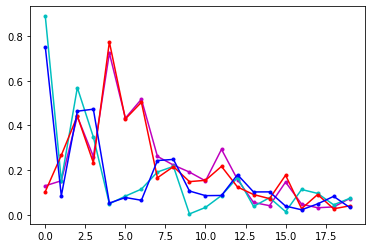

In [245]:
# Plot all correlations (scaled and not)
plt.plot(abs(r1_11), 'm.-')
plt.plot(abs(r2_12), 'c.-')
plt.plot(abs(r1_11_scaled), 'r.-')
plt.plot(abs(r2_12_scaled), 'b.-')

There's not a discernible difference in the correlation values
depending on whether the input is scaled or not, so let's 
continue with the original values

r1_r2 correlations:
[0.83843489 0.02238364 0.85327319 0.57291698 0.13835165 0.08125973
 0.09013028 0.0731448  0.0054797  0.15000036 0.06881942 0.10632854
 0.02127114 0.07506285 0.08220168 0.01484233 0.14701644 0.11090592
 0.01395062 0.12340309]
r11_r12 correlations:
[0.41982015 0.40697033 0.81774298 0.3452716  0.37951699 0.22874316
 0.17162819 0.05357534 0.06490026 0.03472841 0.1378024  0.02162512
 0.00142271 0.00662771 0.20246309 0.10627029 0.09571562 0.02134146
 0.01253316 0.0123751 ]


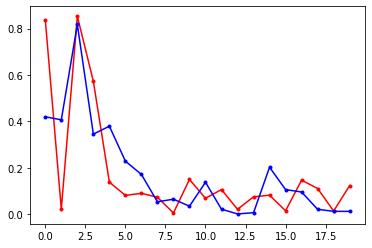

In [251]:
# Correlate shared responses of runs 1 and 2, and 11 and 12
r1_2 = np.zeros(20)
r11_12 = np.zeros(20)

for i in range(20):
    r1_2[i] = np.corrcoef(r1[i,0:-77], r2[i])[0,1]
    r11_12[i] = np.corrcoef(r11[i,0:-61], r12[i])[0,1]
    
print('r1_r2 correlations:')
print(abs(r1_2))

print('r11_r12 correlations:')
print(abs(r11_12))

plt.plot(abs(r1_2), 'r.-')
plt.plot(abs(r11_12), 'b.-')

In [252]:
# Compare each component of run 1 with every component 
# of run 2 to see if there's a better match
best_comp_1_2 = np.zeros(20)
best_corr_1_2 = np.zeros(20)

for i in range(20):
    for j in range(20):
        tempcorr = np.corrcoef(r1[i,0:-77], r2[j])[0,1]
        if np.abs(tempcorr) > np.abs(best_corr_1_2[i]):
            best_corr_1_2[i] = abs(tempcorr)
            best_comp_1_2[i] = j       

# Print the best-matched component of run 11 for every 
# component of run 1
print('Corrcoeff Component\n')
for i in range(20):
    print(np.round(best_corr_1_2[i],2), '\t', np.int(best_comp_1_2[i])+1)

Corrcoeff Component

0.84 	 1
0.44 	 4
0.85 	 3
0.57 	 4
0.58 	 4
0.27 	 9
0.37 	 8
0.25 	 20
0.25 	 18
0.23 	 5
0.23 	 17
0.21 	 18
0.21 	 9
0.22 	 13
0.13 	 11
0.25 	 5
0.2 	 6
0.24 	 16
0.16 	 5
0.23 	 6


In [253]:
# Compare each component of run 2 with every component 
# of run 1 to see if there's a better match
best_comp_2_1 = np.zeros(20)
best_corr_2_1 = np.zeros(20)

for i in range(20):
    for j in range(20):
        tempcorr = np.corrcoef(r2[i], r1[j,0:-77])[0,1]
        if np.abs(tempcorr) > np.abs(best_corr_2_1[i]):
            best_corr_2_1[i] = abs(tempcorr)
            best_comp_2_1[i] = j       

# Print the best-matched component of run 11 for every 
# component of run 1
print('Corrcoeff Component\n')
for i in range(20):
    print(np.round(best_corr_2_1[i],2), '\t', np.int(best_comp_2_1[i])+1)

Corrcoeff Component

0.84 	 1
0.28 	 4
0.85 	 3
0.58 	 5
0.25 	 16
0.23 	 20
0.21 	 8
0.37 	 7
0.27 	 6
0.19 	 5
0.18 	 7
0.21 	 14
0.22 	 14
0.18 	 13
0.19 	 10
0.24 	 18
0.23 	 11
0.25 	 9
0.14 	 16
0.25 	 8


In [254]:
# Compare each component of run 11 with every component 
# of run 12 to see if there's a better match
best_comp_11_12 = np.zeros(20)
best_corr_11_12 = np.zeros(20)

for i in range(20):
    for j in range(20):
        tempcorr = np.corrcoef(r11[i,0:-61], r12[j])[0,1]
        if np.abs(tempcorr) > np.abs(best_corr_11_12[i]):
            best_corr_11_12[i] = abs(tempcorr)
            best_comp_11_12[i] = j       

# Print the best-matched component of run 11 for every 
# component of run 1
print('Corrcoeff Component\n')
for i in range(20):
    print(np.round(best_corr_11_12[i],2), '\t', np.int(best_comp_11_12[i])+1)

Corrcoeff Component

0.58 	 3
0.63 	 4
0.82 	 3
0.35 	 4
0.51 	 1
0.37 	 7
0.33 	 2
0.31 	 1
0.32 	 8
0.23 	 9
0.26 	 5
0.2 	 16
0.25 	 19
0.3 	 8
0.2 	 15
0.34 	 8
0.16 	 15
0.24 	 5
0.23 	 15
0.14 	 5


In [255]:
# Compare each component of run 12 with every component 
# of run 11 to see if there's a better match
best_comp_12_11 = np.zeros(20)
best_corr_12_11 = np.zeros(20)

for i in range(20):
    for j in range(20):
        tempcorr = np.corrcoef(r12[i], r11[j,0:-61])[0,1]
        if np.abs(tempcorr) > np.abs(best_corr_12_11[i]):
            best_corr_12_11[i] = abs(tempcorr)
            best_comp_12_11[i] = j       

# Print the best-matched component of run 11 for every 
# component of run 1
print('Corrcoeff Component\n')
for i in range(20):
    print(np.round(best_corr_12_11[i],2), '\t', np.int(best_comp_12_11[i])+1)

Corrcoeff Component

0.62 	 2
0.41 	 2
0.82 	 3
0.63 	 2
0.38 	 5
0.25 	 16
0.37 	 6
0.34 	 16
0.26 	 14
0.18 	 4
0.25 	 14
0.24 	 7
0.3 	 9
0.18 	 7
0.23 	 19
0.2 	 12
0.22 	 13
0.17 	 6
0.25 	 13
0.21 	 6


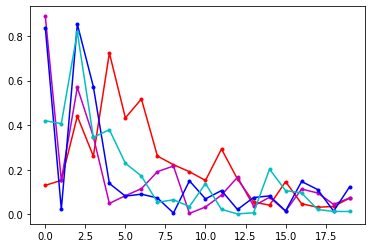

In [256]:
plt.plot(abs(r1_11), 'r.-')
plt.plot(abs(r2_12), 'm.-')
plt.plot(abs(r1_2), 'b.-')
plt.plot(abs(r11_12), 'c.-')

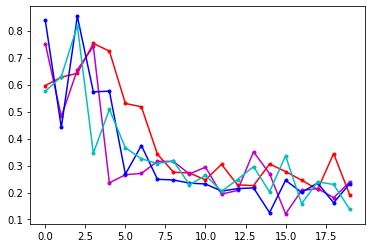

In [257]:
plt.plot(abs(best_corr_1_11), 'r.-')
plt.plot(abs(best_corr_2_12), 'm.-')
plt.plot(abs(best_corr_1_2), 'b.-')
plt.plot(abs(best_corr_11_12), 'c.-')

[Text(0, 0.5, 'Run 12 components'), Text(0.5, 0, 'Run 2 components')]

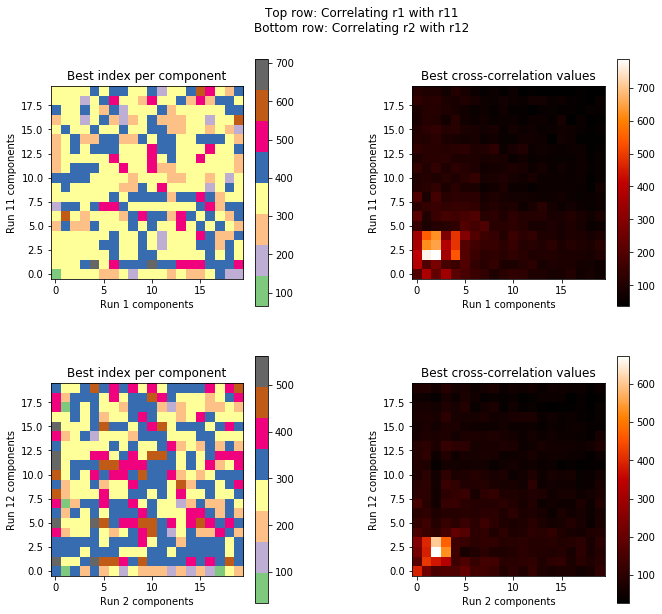

In [232]:
# Let's do some quantification now:
# See at what time lag the correlation with each component is best
# when comparing the scaled shared responses of:
# Runs 1 and 11
# Runs 2 and 11

best_id_r1_11 = np.zeros((20,20), dtype=int)
best_id_r2_12 = np.zeros((20,20), dtype=int)
best_cc_r1_11 = np.zeros((20,20), dtype=float)
best_cc_r2_12 = np.zeros((20,20), dtype=float)

for i in range(20):
    for j in range(20):
        cc = np.correlate(r1_scaled[i], r11_scaled[j], mode='full')
        best_id_r1_11[i,j] = np.where(np.abs(cc)==np.max(np.abs(cc)))[0][0]
        best_cc_r1_11[i,j] = abs(cc[best_id_r1_11[i,j]])
        
        cc = np.correlate(r2_scaled[i], r12_scaled[j], mode='full')
        best_id_r2_12[i,j] = np.where(np.abs(cc)==np.max(np.abs(cc)))[0][0]
        best_cc_r2_12[i,j] = abs(cc[best_id_r2_12[i,j]])
    

# Plot the index at which max cross-correlation was found for 
# each component of run 1 when compared with run 11
# and each component of run 2 when compared with run 12

fig, axs = plt.subplots(2, 2, figsize=(9, 9))
fig.subplots_adjust(left=0.02, bottom=0.06, right=0.95, top=0.9, wspace=0.5)
fig.suptitle('Top row: Correlating r1 with r11\nBottom row: Correlating r2 with r12\n')

im = axs[0,0].imshow(best_id_r1_11, cmap=plt.cm.Accent, origin='lower')
fig.colorbar(im, ax=axs[0,0])
axs[0,0].set_title("Best index per component")
axs[0,0].set(xlabel='Run 1 components', ylabel='Run 11 components')

im = axs[0,1].imshow(best_cc_r1_11, cmap=plt.cm.gist_heat, origin='lower')
fig.colorbar(im, ax=axs[0,1])
axs[0,1].set_title("Best cross-correlation values")
axs[0,1].set(xlabel='Run 1 components', ylabel='Run 11 components')

im = axs[1,0].imshow(best_id_r2_12, cmap=plt.cm.Accent, origin='lower')
fig.colorbar(im, ax=axs[1,0])
axs[1,0].set_title("Best index per component")
axs[1,0].set(xlabel='Run 2 components', ylabel='Run 12 components')

im = axs[1,1].imshow(best_cc_r2_12, cmap=plt.cm.gist_heat, origin='lower')
fig.colorbar(im, ax=axs[1,1])
axs[1,1].set_title("Best cross-correlation values")
axs[1,1].set(xlabel='Run 2 components', ylabel='Run 12 components')

[Text(0, 0.5, 'Run 12 components'), Text(0.5, 0, 'Run 2 components')]

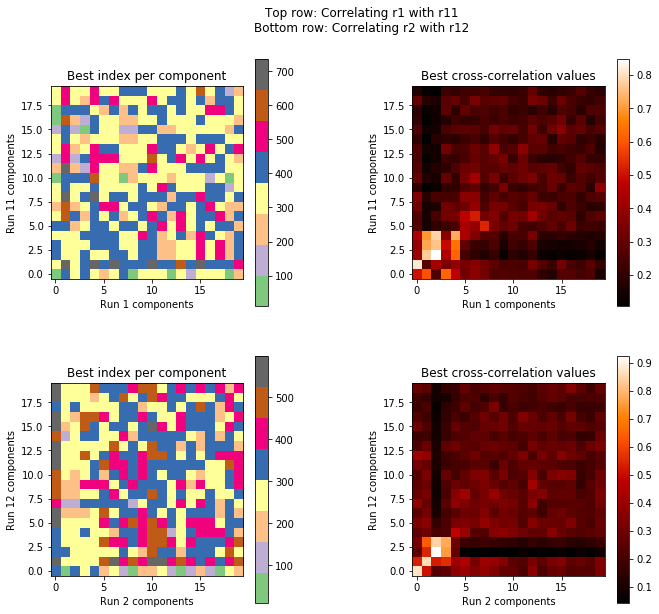

In [233]:
# Let's do some quantification now:
# See at what time lag the correlation with each component is best
# when comparing the normalized shared responses of:
# Runs 1 and 11
# Runs 2 and 11

best_id_r1_11 = np.zeros((20,20), dtype=int)
best_id_r2_12 = np.zeros((20,20), dtype=int)
best_cc_r1_11 = np.zeros((20,20), dtype=float)
best_cc_r2_12 = np.zeros((20,20), dtype=float)

for i in range(20):
    for j in range(20):
        cc = np.correlate(r1_norm[i], r11_norm[j], mode='full')
        best_id_r1_11[i,j] = np.where(np.abs(cc)==np.max(np.abs(cc)))[0][0]
        best_cc_r1_11[i,j] = abs(cc[best_id_r1_11[i,j]])
        
        cc = np.correlate(r2_norm[i], r12_norm[j], mode='full')
        best_id_r2_12[i,j] = np.where(np.abs(cc)==np.max(np.abs(cc)))[0][0]
        best_cc_r2_12[i,j] = abs(cc[best_id_r2_12[i,j]])
    

# Plot the index at which max cross-correlation was found for 
# each component of run 1 when compared with run 11
# and each component of run 2 when compared with run 12

fig, axs = plt.subplots(2, 2, figsize=(9, 9))
fig.subplots_adjust(left=0.02, bottom=0.06, right=0.95, top=0.9, wspace=0.5)
fig.suptitle('Top row: Correlating r1 with r11\nBottom row: Correlating r2 with r12\n')

im = axs[0,0].imshow(best_id_r1_11, cmap=plt.cm.Accent, origin='lower')
fig.colorbar(im, ax=axs[0,0])
axs[0,0].set_title("Best index per component")
axs[0,0].set(xlabel='Run 1 components', ylabel='Run 11 components')

im = axs[0,1].imshow(best_cc_r1_11, cmap=plt.cm.gist_heat, origin='lower')
fig.colorbar(im, ax=axs[0,1])
axs[0,1].set_title("Best cross-correlation values")
axs[0,1].set(xlabel='Run 1 components', ylabel='Run 11 components')

im = axs[1,0].imshow(best_id_r2_12, cmap=plt.cm.Accent, origin='lower')
fig.colorbar(im, ax=axs[1,0])
axs[1,0].set_title("Best index per component")
axs[1,0].set(xlabel='Run 2 components', ylabel='Run 12 components')

im = axs[1,1].imshow(best_cc_r2_12, cmap=plt.cm.gist_heat, origin='lower')
fig.colorbar(im, ax=axs[1,1])
axs[1,1].set_title("Best cross-correlation values")
axs[1,1].set(xlabel='Run 2 components', ylabel='Run 12 components')

[Text(0, 0.5, 'Run 12 components'), Text(0.5, 0, 'Run 2 components')]

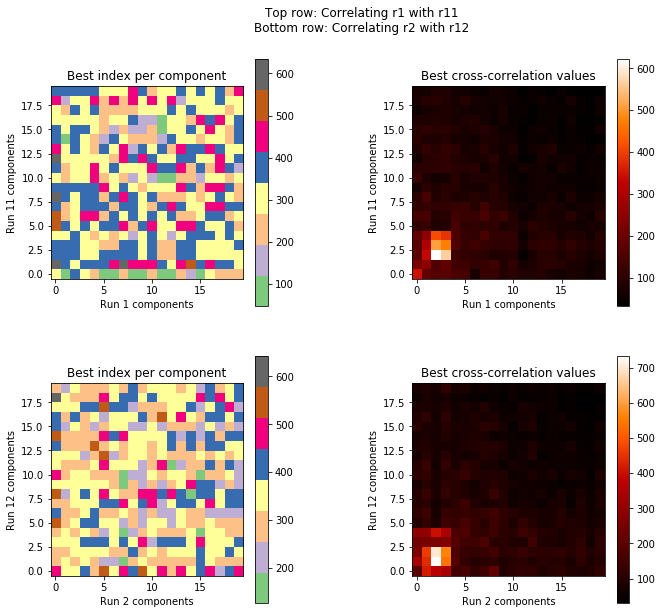

In [234]:
# Let's do some quantification now:
# See at what time lag the correlation with each component is best
# when comparing the scaled shared responses of:
# Runs 1 and 2
# Runs 11 and 12

best_id_r1_2 = np.zeros((20,20), dtype=int)
best_id_r11_12 = np.zeros((20,20), dtype=int)
best_cc_r1_2 = np.zeros((20,20), dtype=float)
best_cc_r11_12 = np.zeros((20,20), dtype=float)

for i in range(20):
    for j in range(20):
        cc = np.correlate(r1_scaled[i], r2_scaled[j], mode='full')
        best_id_r1_2[i,j] = np.where(np.abs(cc)==np.max(np.abs(cc)))[0][0]
        best_cc_r1_2[i,j] = abs(cc[best_id_r1_2[i,j]])
        
        cc = np.correlate(r11_scaled[i], r12_scaled[j], mode='full')
        best_id_r11_12[i,j] = np.where(np.abs(cc)==np.max(np.abs(cc)))[0][0]
        best_cc_r11_12[i,j] = abs(cc[best_id_r11_12[i,j]])
    
# Plot the index at which max cross-correlation was found for 
# each component of run 1 when compared with run 11
# and each component of run 2 when compared with run 12

fig, axs = plt.subplots(2, 2, figsize=(9, 9))
fig.subplots_adjust(left=0.02, bottom=0.06, right=0.95, top=0.9, wspace=0.5)
fig.suptitle('Top row: Correlating r1 with r11\nBottom row: Correlating r2 with r12\n')

im = axs[0,0].imshow(best_id_r1_2, cmap=plt.cm.Accent, origin='lower')
fig.colorbar(im, ax=axs[0,0])
axs[0,0].set_title("Best index per component")
axs[0,0].set(xlabel='Run 1 components', ylabel='Run 11 components')

im = axs[0,1].imshow(best_cc_r1_2, cmap=plt.cm.gist_heat, origin='lower')
fig.colorbar(im, ax=axs[0,1])
axs[0,1].set_title("Best cross-correlation values")
axs[0,1].set(xlabel='Run 1 components', ylabel='Run 11 components')

im = axs[1,0].imshow(best_id_r11_12, cmap=plt.cm.Accent, origin='lower')
fig.colorbar(im, ax=axs[1,0])
axs[1,0].set_title("Best index per component")
axs[1,0].set(xlabel='Run 2 components', ylabel='Run 12 components')

im = axs[1,1].imshow(best_cc_r11_12, cmap=plt.cm.gist_heat, origin='lower')
fig.colorbar(im, ax=axs[1,1])
axs[1,1].set_title("Best cross-correlation values")
axs[1,1].set(xlabel='Run 2 components', ylabel='Run 12 components')

[Text(0, 0.5, 'Run 12 components'), Text(0.5, 0, 'Run 2 components')]

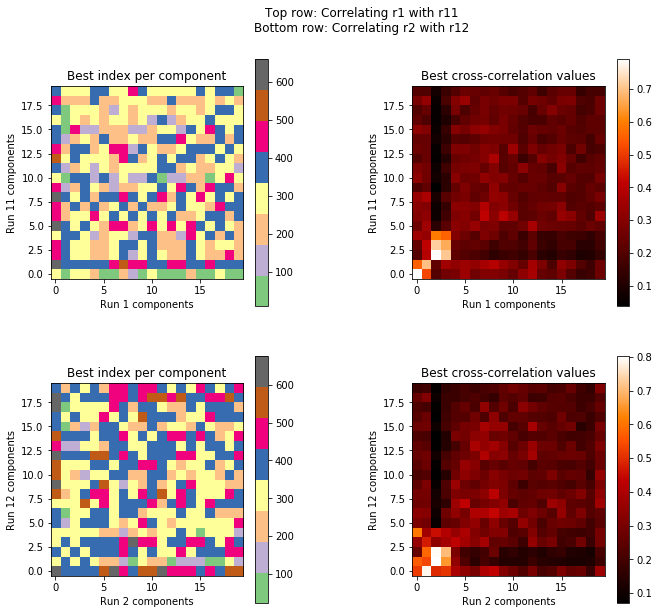

In [235]:
# Let's do some quantification now:
# See at what time lag the correlation with each component is best
# when comparing the scaled shared responses of:
# Runs 1 and 2
# Runs 11 and 12

best_id_r1_2 = np.zeros((20,20), dtype=int)
best_id_r11_12 = np.zeros((20,20), dtype=int)
best_cc_r1_2 = np.zeros((20,20), dtype=float)
best_cc_r11_12 = np.zeros((20,20), dtype=float)

for i in range(20):
    for j in range(20):
        cc = np.correlate(r1_norm[i], r2_norm[j], mode='full')
        best_id_r1_2[i,j] = np.where(np.abs(cc)==np.max(np.abs(cc)))[0][0]
        best_cc_r1_2[i,j] = abs(cc[best_id_r1_2[i,j]])
        
        cc = np.correlate(r11_norm[i], r12_norm[j], mode='full')
        best_id_r11_12[i,j] = np.where(np.abs(cc)==np.max(np.abs(cc)))[0][0]
        best_cc_r11_12[i,j] = abs(cc[best_id_r11_12[i,j]])
    
# Plot the index at which max cross-correlation was found for 
# each component of run 1 when compared with run 11
# and each component of run 2 when compared with run 12

fig, axs = plt.subplots(2, 2, figsize=(9, 9))
fig.subplots_adjust(left=0.02, bottom=0.06, right=0.95, top=0.9, wspace=0.5)
fig.suptitle('Top row: Correlating r1 with r11\nBottom row: Correlating r2 with r12\n')

im = axs[0,0].imshow(best_id_r1_2, cmap=plt.cm.Accent, origin='lower')
fig.colorbar(im, ax=axs[0,0])
axs[0,0].set_title("Best index per component")
axs[0,0].set(xlabel='Run 1 components', ylabel='Run 11 components')

im = axs[0,1].imshow(best_cc_r1_2, cmap=plt.cm.gist_heat, origin='lower')
fig.colorbar(im, ax=axs[0,1])
axs[0,1].set_title("Best cross-correlation values")
axs[0,1].set(xlabel='Run 1 components', ylabel='Run 11 components')

im = axs[1,0].imshow(best_id_r11_12, cmap=plt.cm.Accent, origin='lower')
fig.colorbar(im, ax=axs[1,0])
axs[1,0].set_title("Best index per component")
axs[1,0].set(xlabel='Run 2 components', ylabel='Run 12 components')

im = axs[1,1].imshow(best_cc_r11_12, cmap=plt.cm.gist_heat, origin='lower')
fig.colorbar(im, ax=axs[1,1])
axs[1,1].set_title("Best cross-correlation values")
axs[1,1].set(xlabel='Run 2 components', ylabel='Run 12 components')